In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Show first row of measurement table
firstRow_measurement = session.query(Measurement).first()
firstRow_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2414c555278>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [10]:
# Show first row of station table
firstRow_station = session.query(Station).first()
firstRow_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2414c555a20>,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'latitude': 21.2716,
 'id': 1,
 'station': 'USC00519397',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
engine.execute("SELECT MAX(date) FROM measurement").fetchall()

[('2017-08-23',)]

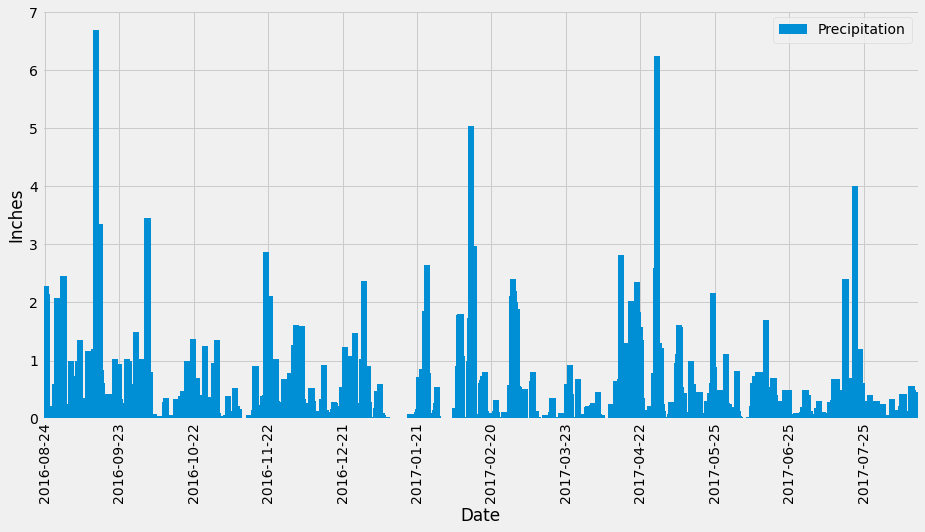

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
mostRecent_str = engine.execute("SELECT MAX(date) FROM measurement").fetchall()[0][0]
mostRecent_dt = dt.datetime.strptime(mostRecent_str, "%Y-%m-%d")
# Calculate the date one year from the last date in data set.
yearAgo_dt = mostRecent_dt.replace(year=mostRecent_dt.year-1)
yearAgo_str = dt.datetime.strftime(yearAgo_dt, "%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
results = engine.execute(f"SELECT * FROM measurement WHERE date > '{yearAgo_str}';").fetchall()
# Save the query results as a Pandas DataFrame and set the index to the date column
measurements_df = pd.DataFrame(results, columns=['id', 'Station', 'Date', 'Precipitation', 'TOBS'])
# Set the index to the id from the database
measurements_df.set_index('id', inplace=True)

# Sort the dataframe by date(should already be)
measurements_df.sort_values('Date',inplace=True, ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
ax = measurements_df.plot.bar(x="Date", y="Precipitation", width=16, figsize=(14, 7))
ax.set_xticks(ax.get_xticks()[::190])
ax.set_xticklabels(measurements_df["Date"][::190])
plt.ylabel("Inches")
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
session.close()